# Airplane Delay Prediction

Khoa Minh Pham
<br>2-Jan-2023

## I. Introduction

Delayed flight is and alway be a headache problem for any airlines. A Vietnamese's research that shows there are more than 5600 flights were delayed just in single month in 2022 which is nearly 20% of total flights. With increasing in the demand for air travel, effects of flight delay have been significant impact to airline which costs them not only money in short-term but also trust of customers in a long run and eventually bring down whole business. Throughout this document we will run an analysis on 2008 US airplane data to reveal insights, setup some predictive modeling and simulation to focast delay in advance. First let take a look on dataset and its attributes

In [151]:
#Import some usefull library

import numpy as np
from random import randint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pl
%matplotlib inline

In [193]:
df=pd.read_csv('./2008.csv.bz2')

In [194]:
df.shape

(2389217, 29)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               2389217 non-null  int64  
 1   Month              2389217 non-null  int64  
 2   DayofMonth         2389217 non-null  int64  
 3   DayOfWeek          2389217 non-null  int64  
 4   DepTime            2324775 non-null  float64
 5   CRSDepTime         2389217 non-null  int64  
 6   ArrTime            2319121 non-null  float64
 7   CRSArrTime         2389217 non-null  int64  
 8   UniqueCarrier      2389217 non-null  object 
 9   FlightNum          2389217 non-null  int64  
 10  TailNum            2346765 non-null  object 
 11  ActualElapsedTime  2319121 non-null  float64
 12  CRSElapsedTime     2388810 non-null  float64
 13  AirTime            2319121 non-null  float64
 14  ArrDelay           2319121 non-null  float64
 15  DepDelay           2324775 non-n

In [17]:
df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Delay
count,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06
mean,2.510822e+00,1.569615e+01,3.915920e+00,1.340110e+03,1.329276e+03,1.485835e+03,1.495851e+03,2.193088e+03,1.286189e+02,1.297345e+02,1.051017e+02,1.027356e+01,1.138916e+01,7.298125e+02,6.839862e+00,1.667739e+01,1.481123e-01
std,1.123481e+00,8.744870e+00,1.982640e+00,4.802426e+02,4.660631e+02,5.081294e+02,4.848133e+02,1.942080e+03,7.025305e+01,6.971684e+01,6.766802e+01,3.963430e+01,3.642260e+01,5.591560e+02,4.846436e+00,1.101203e+01,3.552113e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.250000e+02,1.110000e+03,1.115000e+03,5.960000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.280000e+02,4.000000e+00,1.000000e+01,0.000000e+00
50%,3.000000e+00,1.600000e+01,4.000000e+00,1.331000e+03,1.322000e+03,1.516000e+03,1.519000e+03,1.529000e+03,1.110000e+02,1.120000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.850000e+02,6.000000e+00,1.400000e+01,0.000000e+00
75%,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.574000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.640000e+02,8.000000e+00,1.900000e+01,0.000000e+00
max,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.740000e+03,9.050000e+02,6.600000e+02,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00


At the first look, we had 2389217 flights in 2008. Each flight was recorded with 29 different variable also called feature in data science
<br>"UniqueCarrier, Origin, Dest, TailNum" are regconized as categorical feature (non-numeric) which need to be handled before running any classification so let note them down.
<br>Max - Month = 4 so data is collected only in 4 first month of 2008

In [6]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

For some features, there are more than 50% of missing values and unique value. The best way is to eliminate these features since as no good for our analysis. And remember that this is analysis on delayed flight so let remove row with missing ArrDelay too.

In [153]:
df.dropna(subset=['ArrDelay'], inplace=True)

In [154]:
for i in df.columns:
    if df[i].nunique() == 1:
        df.drop(i, axis = 1, inplace = True)

In [155]:
for i in df.columns:
    if df[i].isnull().sum() > df.shape[0]*0.5:
        df.drop(i, axis = 1, inplace = True)

In [10]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              2
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

Remove 2 missing data of TailNum feature so we can have clean dataset

In [156]:
df.dropna(subset=['TailNum'], inplace=True)

Following requirement, we add 1 new column to dataset to indicate delayed flights.
<br>A flight only counts as late if it is more than 30 minutes late.

In [157]:
df['Delay']= df['ArrDelay'].apply(lambda x : 1 if x>30 else 0)

At the first look I tried to remove unrelavant feature like TailNum and high correlation features but with my 2nd thought I would like to keep all of them and put them through PCA at later and see how it behave in term of model'performance
<br> Basically, now we have clean dataset that can be proceed in next step for some useful insights

## II. Insights & Data visualization

Text(0.5, 1.0, 'Arriral Delay in minute - Distribution: mean=10.27 and std=39.63')

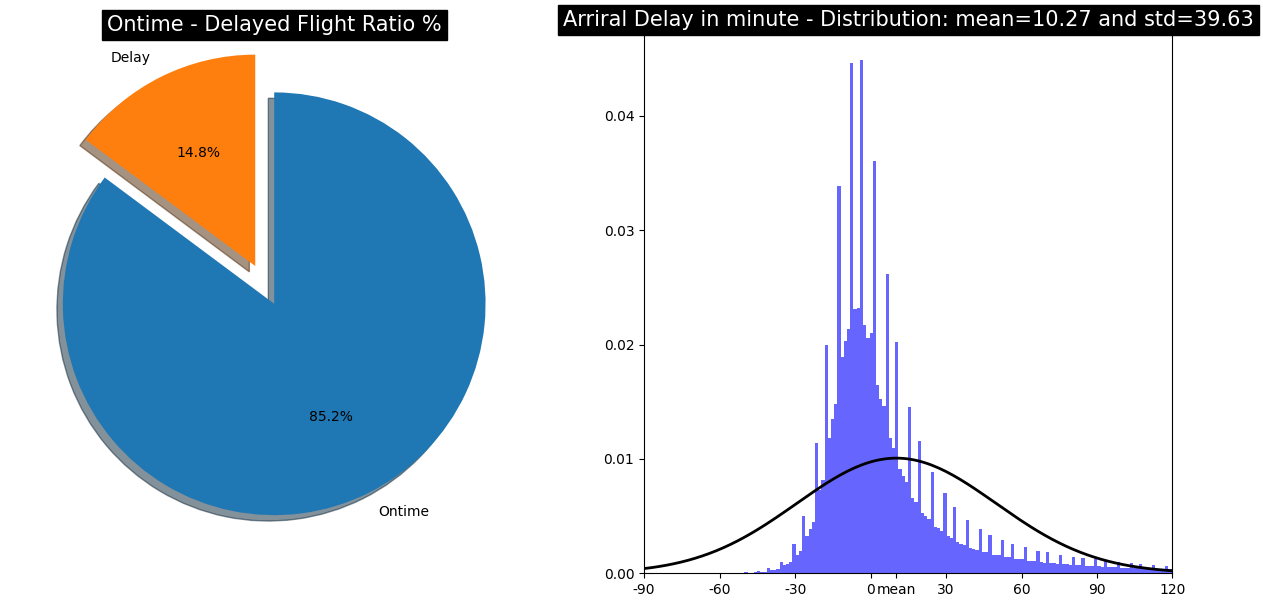

In [158]:
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from scipy.stats import ttest_ind
from scipy.stats import norm
import statistics
count = df['Delay'].value_counts()
##plt.figure(figsize = (8, 4))
fig1 = plt.figure(1, figsize=(15,7))
gs1=GridSpec(1,2)
fig1_1=fig1.add_subplot(gs1[0,0]) 
fig1_2=fig1.add_subplot(gs1[0,1]) 
fig1_1.pie(count, labels=['Ontime','Delay'],startangle=90,counterclock=False,
             autopct='%1.1f%%',explode=[0,0.2], shadow=True)
fig1_1.set_title('Ontime - Delayed Flight Ratio %', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
mean, std = norm.fit(df['ArrDelay'].values)
fig1_2.hist(df['ArrDelay'].values, bins=2000, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax,2000)
fig1_2.set_xlim(xmin=-90, xmax = 120)
p = norm.pdf(x, mean, std)
x_ticks = [-90, -60, -30, 0, mean, 30, 60, 90, 120]
x_labels = ['-90', '-60', '-30', '0','mean', '30', '60', '90', '120']
fig1_2.set_xticks(ticks=x_ticks, labels=x_labels)
fig1_2.plot(x, p, 'k', linewidth=2)
title = 'Arriral Delay in minute - Distribution: mean={:.2f} and std={:.2f}'.format(mean, std)
fig1_2.set_title(title, bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)

Ratio of On-time flights to Delayed flight is 5.7 : 1
<br> This can be considered as imbalanced dateset which can produce an issue in classification
<br>We may need to perform oversampling/undersampling technique at later
<br>I also add best normal distribute line for delay time in minute
<br> 95% of delay time in range of [-68.99 : 89.53]

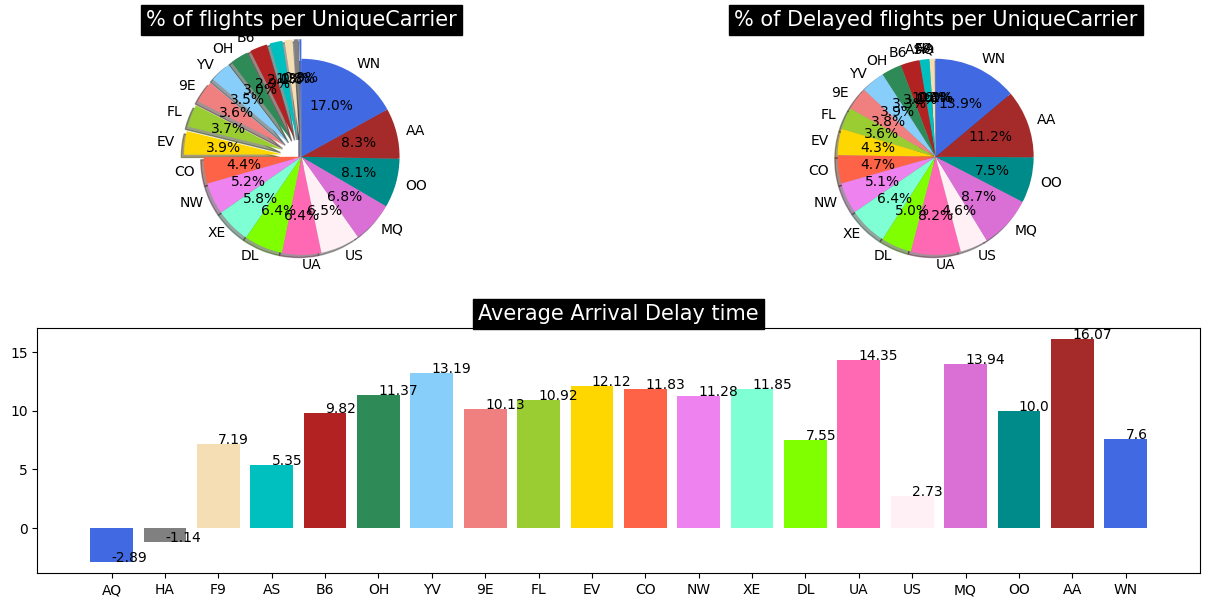

In [159]:
def get_stats(group):
    return {
            'count': group.count(), 'mean': group.mean(), 'sum': group.sum()}
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse', 'hotpink','lavenderblush','orchid','darkcyan','brown']
fig2 = plt.figure(1, figsize=(15,7))
gs2=GridSpec(2,2)
fig2_1=fig2.add_subplot(gs2[0,0]) 
fig2_2=fig2.add_subplot(gs2[0,1])
fig2_3=fig2.add_subplot(gs2[1,:]) 
carrier_arrdelay = df['ArrDelay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
carrier_arrdelay = carrier_arrdelay.sort_values('count')
carrier_arrdelay = carrier_arrdelay.round(2)
explode = [0.2 if carrier_arrdelay['count'][i] < 100000 else 0.0 for i in range(carrier_arrdelay.shape[0])]
fig2_1.pie(carrier_arrdelay['count'], labels=carrier_arrdelay.index,startangle=90,
             autopct='%1.1f%%', shadow=True, colors = colors, explode = explode)
fig2_1.set_title('% of flights per UniqueCarrier', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
carrier_delay = df['Delay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
carrier_delay = carrier_delay.sort_values('count')
carrier_delay = carrier_delay.round(2)
fig2_2.pie(carrier_delay['sum'], labels=carrier_delay.index,startangle=90,
             autopct='%1.1f%%', shadow=True, colors = colors)
fig2_2.set_title('% of Delayed flights per UniqueCarrier', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
fig2_3.bar(carrier_arrdelay.index, carrier_arrdelay['mean'], color=colors)
fig2_3.set_title('Average Arrival Delay time', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
for i in range(carrier_arrdelay.shape[0]):
        plt.text(i,carrier_arrdelay['mean'][i],carrier_arrdelay['mean'][i])



In year of 2008, WN carrier occupied 17% of total flight to became a most popular used, followed by AA carrier in 2nd place which is 8.3%. Take a look on percentage of delayed flights, althought, WN carrier was still be in a 1st place but only 13.9%  Delays of total, AA is right behind with 11.2% so it got worse performance in comparison

Its bad perform was  clearly shown in next visualization. The average delay of AA is 16 minutes - which is highest delay time and more than 2 time WN's average delay time. Next let see how delayed flights distribute over Origin Airport and destination airport 

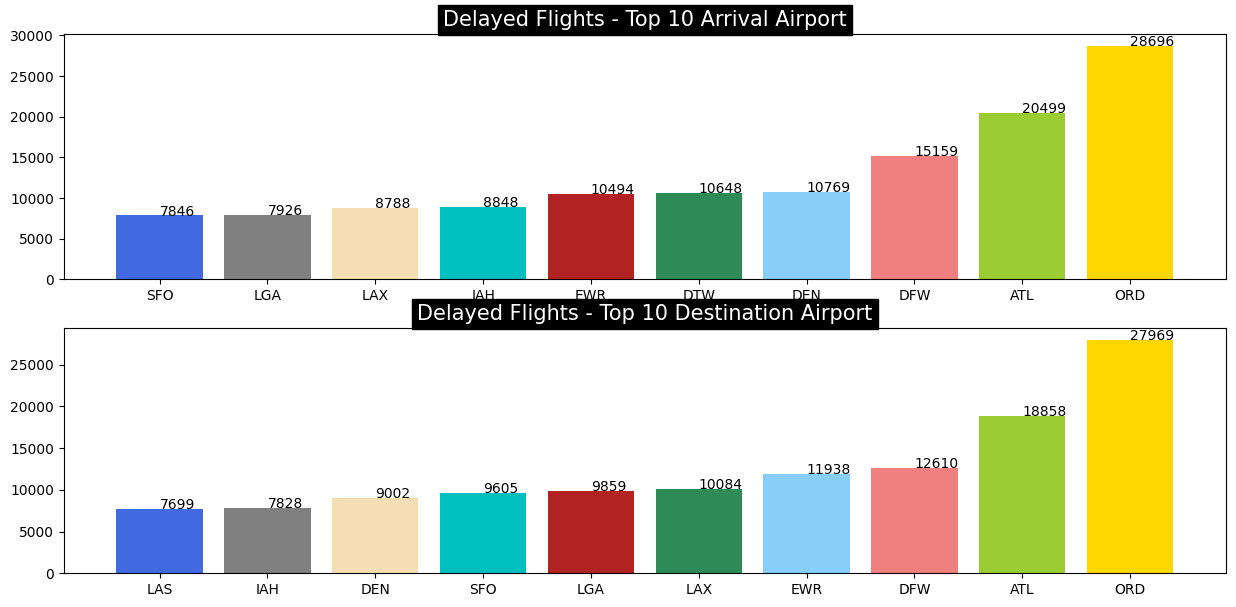

In [160]:
fig3 = plt.figure(1, figsize=(15,7))
gs3=GridSpec(2,2)
fig3_1=fig3.add_subplot(gs3[0,:]) 
fig3_2=fig3.add_subplot(gs3[1,:])
origin_delay = df['Delay'].groupby(df['Origin']).apply(get_stats).unstack()
origin_delay = origin_delay.sort_values('sum').tail(10)
dest_delay = df['Delay'].groupby(df['Dest']).apply(get_stats).unstack()
dest_delay = dest_delay.sort_values('sum').tail(10)
fig3_1.bar(origin_delay.index, origin_delay['sum'], color=colors)
fig3_1.set_title('Delayed Flights - Top 10 Arrival Airport', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
for i in range(10):
        fig3_1.text(i,int(origin_delay['sum'][i]),int(origin_delay['sum'][i]))
fig3_2.bar(dest_delay.index, dest_delay['sum'], color=colors)
fig3_2.set_title('Delayed Flights - Top 10 Destination Airport', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
for i in range(10):
        fig3_2.text(i,int(dest_delay['sum'][i]),int(dest_delay['sum'][i]))

We got consistant top 3 in both origin and destination airport which are ORD, ATL, DFW respectively to 1st, 2nd and 3rd place. ORD The Southwest Oregon Regional Airport's delayed flights is 2 time than 3rd - DFW to become most known busiest airport in 2008 and over years

Text(0.5, 1.0, '% of Delayed Flights - Day of Week')

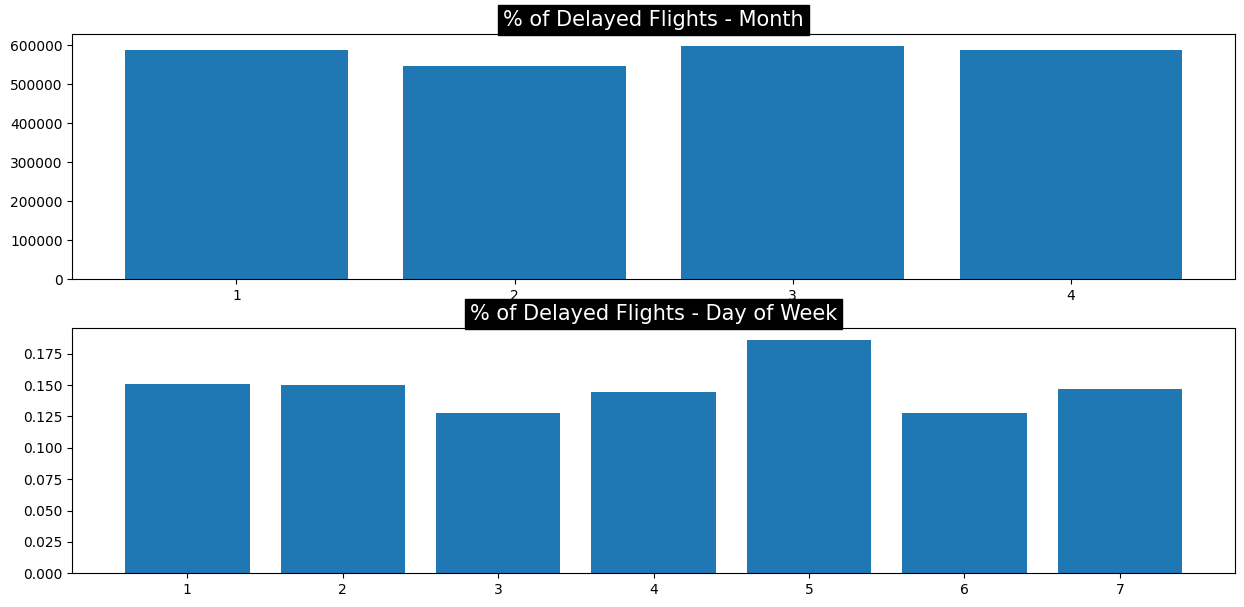

In [161]:
fig4 = plt.figure(1, figsize=(15,7))
gs4=GridSpec(2,2)
fig4_1=fig4.add_subplot(gs4[0,:]) 
fig4_2=fig4.add_subplot(gs4[1,:])
month_delay = df['Delay'].groupby(df['Month']).apply(get_stats).unstack()
month_delay = month_delay.sort_values('count')
week_delay = df['Delay'].groupby(df['DayOfWeek']).apply(get_stats).unstack()
week_delay = week_delay.sort_values('sum')
fig4_1.bar(month_delay.index, month_delay['count'],tick_label=month_delay.index)
fig4_1.set_title('% of Delayed Flights - Month', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
#for i in range(month_delay.shape[0]):
#        fig4_1.text(i,month_delay['sum'][i],month_delay['sum'][i])
fig4_2.bar(week_delay.index, week_delay['mean'])
fig4_2.set_title('% of Delayed Flights - Day of Week', bbox={'facecolor':'black', 'pad':3},
              color = 'w',fontsize=15)
#for i in range(week_delay.shape[0]):
#        fig4_2.text(i,int(week_delay['sum'][i]),int(week_delay['sum'][i]))

There not much differences among months and day of week
<br> March and Thursday have highest delayed flights

## III. Predictive Modeling

### 1. Data preparation

Like said before, there are categorical feature need to be dealed with since most of machine learning models work with numeric values only. So when facing with category, we need to transform them into numerical value under some set of rule. we have multiple supported encoder to help us on this:
<p> - One hot encoder
<br> - dummy
<br> - Leave one out encoder
<br> - Cat boost encoder
<br> - Binary ....
<p> In this analysis Leave one out encoder is used to avoid expand our dataset as some feature has great number of unique value like Origin, Dest,...

In [162]:
cat_feature = ['UniqueCarrier', 'Origin','Dest','TailNum']
#num_feature = ['ArrTime','Distance','TaxiIn','TaxiOut','Month','DayofMonth','DayOfWeek']
#all_features = np.append(cat_feature,num_feature)
for i in cat_feature:
    df[i]= df[i].astype('category')
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319119 entries, 0 to 2389216
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Month              2319119 non-null  int64   
 1   DayofMonth         2319119 non-null  int64   
 2   DayOfWeek          2319119 non-null  int64   
 3   DepTime            2319119 non-null  float64 
 4   CRSDepTime         2319119 non-null  int64   
 5   ArrTime            2319119 non-null  float64 
 6   CRSArrTime         2319119 non-null  int64   
 7   UniqueCarrier      2319119 non-null  category
 8   FlightNum          2319119 non-null  int64   
 9   TailNum            2319119 non-null  category
 10  ActualElapsedTime  2319119 non-null  float64 
 11  CRSElapsedTime     2319119 non-null  float64 
 12  AirTime            2319119 non-null  float64 
 13  ArrDelay           2319119 non-null  float64 
 14  DepDelay           2319119 non-null  float64 
 15  Origin         

In [163]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from collections import Counter
smk = SMOTETomek()

The basic idea of machine learning is usage of historical data to train model or program then the model can be implemented to predict an possible outcome with given inputs. That means we will use 2008 data to train our model. 
<p> Most common practice is splitting dataset into training data & test data. Test date is used to evaluate our model performance after training. This also to prevent Leakage of data.
<p> Usually, the splitting is done before fitting training date to model. But in our case we will use diferent technique to encode, normalization, oversampling which their algorithm can cause data leaking. So the best way is to split the dataset at this very step.
<br> Example, oversampling Leave One Out encode (target encoding) - transform categorical data into numerical data, it algorithm is taking average of all target data expect but ignore the value in current row (prevent target leakage) but since it take the average of all other row it can cause data leaking.

In [164]:
#Separate data set and target set
target = 'Delay'
y = df[target]
X= df.drop(columns=[target])
#Split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [165]:
#encoder = ce.LeaveOneOutEncoder(return_df=True)
encoder = ce.LeaveOneOutEncoder()
X_train_loo= encoder.fit_transform(X_train,y_train)
X_test_loo= encoder.fit_transform(X_test,y_test)

In [28]:
#CB_encoder = ce.cat_boost.CatBoostEncoder()
#X_train_CE= CB_encoder.fit_transform(X_train,y_train)
#X_test_CE= CB_encoder.fit_transform(X_test,y_test)

Now we have encoded train/test data,stored in X_train_loo/X_test_loo. Let check its characteristic

In [29]:
X_train_loo.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
count,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06,1.623383e+06
mean,2.510692e+00,1.570111e+01,3.917730e+00,1.340214e+03,1.329372e+03,1.485977e+03,1.496072e+03,1.481770e-01,2.193308e+03,1.481746e-01,1.285732e+02,1.296892e+02,1.050607e+02,1.028123e+01,1.139725e+01,1.481770e-01,1.481771e-01,7.294843e+02,6.843211e+00,1.666938e+01
std,1.123652e+00,8.744792e+00,1.982497e+00,4.802349e+02,4.660385e+02,5.081424e+02,4.847104e+02,3.239468e-02,1.941076e+03,5.338921e-02,7.021842e+01,6.968262e+01,6.763646e+01,3.960415e+01,3.639203e+01,4.258259e-02,4.251357e-02,5.589206e+02,4.859360e+00,1.101609e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.362637e-02,1.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.250000e+02,1.110000e+03,1.115000e+03,1.215327e-01,5.960000e+02,1.111111e-01,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,1.236809e-01,1.241258e-01,3.280000e+02,4.000000e+00,1.000000e+01
50%,3.000000e+00,1.600000e+01,4.000000e+00,1.331000e+03,1.322000e+03,1.516000e+03,1.519000e+03,1.442524e-01,1.531000e+03,1.439394e-01,1.110000e+02,1.120000e+02,8.700000e+01,0.000000e+00,0.000000e+00,1.432796e-01,1.410015e-01,5.850000e+02,6.000000e+00,1.400000e+01
75%,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,1.691535e-01,3.574000e+03,1.792453e-01,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,1.701273e-01,1.618839e-01,9.630000e+02,8.000000e+00,1.900000e+01
max,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.988461e-01,9.740000e+03,1.000000e+00,9.050000e+02,6.600000e+02,8.860000e+02,2.461000e+03,2.467000e+03,3.500000e-01,4.390244e-01,4.962000e+03,2.130000e+02,3.830000e+02


With min/max value, we easily regconize features of our data are in different scales
For example, Month in range of [1,4] and Day of month in range of [1,31]
The fact that weight can impact some of our model heavily and lead to overfitting that finally affact our modeling score/prediction. So at this point we use scaler to normalization/standardization our data
<p> Some useful scaler can be considered as standard scaler, min max scaler. Standard scaler is most common way but later we have to  performe feature selecting by using PCA  which  not accept negative input so let use Min/Max scaler this time

In [166]:
MM_scaler= MinMaxScaler()
scaled_train_data = MM_scaler.fit_transform(X_train_loo, y_train)
scaled_test_data = MM_scaler.fit_transform(X_test_loo, y_test)

With this scaled & encoded data, now it is usable for the next step with is Feature Selecting

### 2. Feature Selecting

Three Feature selecton we will try using on different mothods: 
<br> SelectKBest - Univariate Feature Selection
<br> RFE - Recursive Feature Elimination
<br> PCA - Principal Component Analysis
<br> But only PCA output will be used in our need step
<br> Different than PCA, when SelectKBest & RFE are applied please watch out for highly correlated feature. Otherwise you may chose inapproriated features which will lower your model's performance

In [167]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE

In [168]:
SKB = SelectKBest(score_func= chi2,k=4)

In [169]:
fit_SKB = SKB.fit(scaled_train_data,y_train)

In [170]:
i = 0
print('======= Feature scores using Select K Best =======') 
for i in range(scaled_train_data.shape[1]):
    print(i+1,j[i],': %0.2f' % fit_SKB.scores_[i])
    i = i + 1

======= Feature scores using Select K Best =======
1 Month : 597.21
2 DayofMonth : 185.44
3 DayOfWeek : 0.74
4 DepTime : 4080.26
5 CRSDepTime : 1776.03
6 ArrTime : 1059.60
7 CRSArrTime : 1590.78
8 UniqueCarrier : 647.25
9 FlightNum : 325.66
10 TailNum : 518.51
11 ActualElapsedTime : 510.29
12 CRSElapsedTime : 27.23
13 AirTime : 81.66
14 ArrDelay : 5330.24
15 DepDelay : 3767.18
16 Origin : 797.01
17 Dest : 630.12
18 Distance : 9.40
19 TaxiIn : 179.91
20 TaxiOut : 2441.82


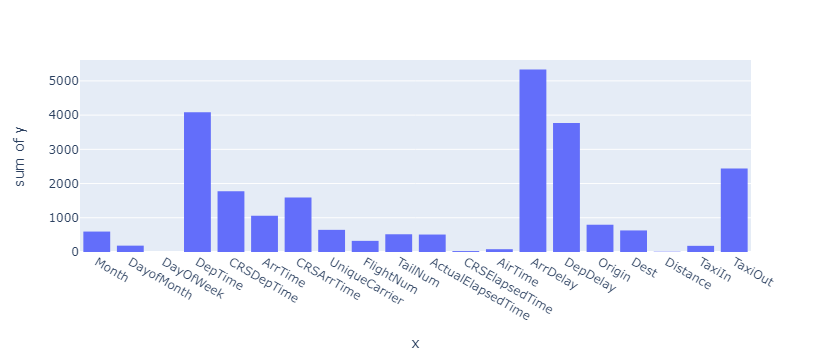

In [171]:
bar = pl.histogram(y=fit_SKB.scores_, x = j)
bar.show()

Higher score better feature to use but like I said make sure you remove all high correlation BEFORE using SelectKBest.RFE for feature selecting. Example: ArrDelay feature need to be removed.
<br>Removing high correlation is not shown here but you check for them by printing out yourDataFrame.corr(numeric_only=True).

In [172]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(scaled_train_data, y_train)
rfe = RFE(LR_model, n_features_to_select = 5)

In [173]:
fit_RFE = rfe.fit(scaled_train_data,y_train)

In [174]:
print('Feature Ranking: %s ' % fit_RFE.ranking_)

Feature Ranking: [12 11 16  4  5 10  9 15 14  7  1  1  1  1  1 13  8  6  3  2] 


In [175]:
X_RFE = fit_RFE.transform(scaled_train_data)

PCA-Principle component analysis is one of famous methodology that replace a N groups of correlated variable by M< N group of uncorrelated groups of variable. With new M component we have PC1 to PCM which represent linear combination of variable.
<br> PC1 will be the most important component in our model with highest coeffient. The total of coeffient should be around 90% and this will indicate how many M components we should have. In case we will need 7 components

In [176]:
pca = PCA(n_components=7)
fit_PCA = pca.fit(scaled_train_data)
fit_PCA2 = pca.fit(scaled_test_data)

var = fit_PCA.explained_variance_ratio_
print('Explain Variance Ratio %:',var)

Explain Variance Ratio %: [0.21514011 0.21181536 0.16671883 0.12847535 0.11168525 0.0627559
 0.03982591]


Fit our data PCA & save for later uses, both training & test set.
<br> Last but not least, in preparation phase, one problem usually happen to binary class target is imbalanced ouput
<br> That also means imbalanced train data and if we use this data to train our model, it will be biased towards the majority which is 0 - Ontime prediction => False negative
<p> That's why we need to transform it one more time by using Oversampling technique. This technique will try to produce cases (dataset) with output of 1 (Minority) based on current dataset, there are many algorithm to do that and we will use SMOTET technique - defind K nearest neighbor and take the difference with feature vector multiply by random value from 0 to 1 then we have new point of data.
<p> There is undersampling technique which not increase the minority but decrease the majority to make it balance. However this can lead to loss of important data so we do not consider undersampling technique this time

In [177]:
X_train_PCA = fit_PCA.transform(scaled_train_data)
X_test_PCA = fit_PCA2.transform(scaled_test_data)

In [178]:
X_train_balance,y_train_balance = smk.fit_resample(X_train_PCA,y_train)
X_test_balance,y_test_balance = smk.fit_resample(X_test_PCA,y_test)
print('Imbalanced train set {}'.format(Counter(y_train)))
print('Balanced train set {}'.format(Counter(y_train_balance)))
print('Imbalanced test set {}'.format(Counter(y_test)))
print('Balanced test set {}'.format(Counter(y_test_balance)))

Imbalanced train set Counter({0: 1382835, 1: 240548})
Balanced train set Counter({0: 1342469, 1: 1342469})
Imbalanced test set Counter({0: 592794, 1: 102942})
Balanced test set Counter({0: 576101, 1: 576101})


After getting balanced dataset, we are ready to start training our model

### 3. Model Training & Evaluating

In [183]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc

In [184]:
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
GNB_model = GaussianNB()
GB_model = GradientBoostingClassifier()
SVM_model = LinearSVC()

Before hyperparameter tuning to get best/sufficient parameters. Let run model with default option
<br>In each model, there is explaination on how it works 

##### Logistic Regression with defaut opts

The best way to understand what is logistic regression is relating it to linear regression
<br> In linear regression we try defind a function with a linear line which have smallest total distance of every data point

$y = \beta_0 + X\beta_1$  </t>Now put this to sigmoid function $g(z) = \frac{1}{1+e^{-z}}$
<br>So we have a new equation represent to Logistis regression
<br> $y = \frac{1}{1+e^{-\beta_0 + X\beta_1}}$

In [186]:
run_LR = LR_model.fit(X_train_balance, y_train_balance)
run_LR.score(X_test_balance, y_test_balance)

0.6146344130629873

In [187]:
print (classification_report(y_test_balance,run_LR.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61    576101
           1       0.61      0.62      0.62    576101

    accuracy                           0.61   1152202
   macro avg       0.61      0.61      0.61   1152202
weighted avg       0.61      0.61      0.61   1152202



In [190]:
def make_roc(name, model, x_test, y_test, ax=None, proba=True):
    ax=plt.gca()
    if proba:
        fpr, tpr, thresholds=roc_curve(y_test, model.predict_proba(x_test)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(y_test, model.decision_function(x_test))
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    ax.legend(loc='lower right')

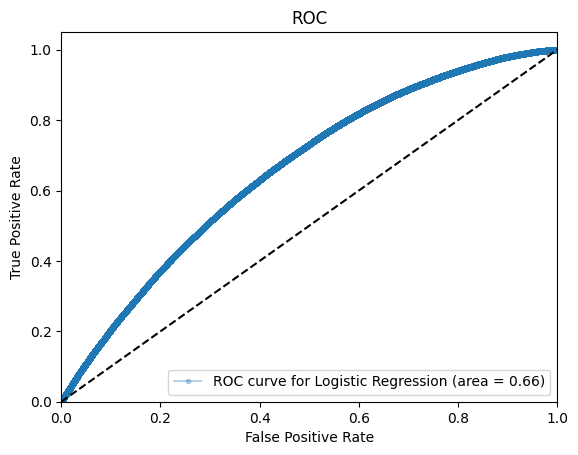

In [191]:
make_roc('Logistic Regression', run_LR, X_test_balance, y_test_balance)

##### Decision Tree classifier with defaut opts

Decision tree  can be imagined as a tree built with if- Yes/No structure, where theroot - first IF in the top and expand by its leaf node, node to the bottom. These are also similar to flowcharts.
<br> So by breaking down data structure in to small subset Decision tree increase performance by increase number breakdown but this also create overfitting - a phenomenon that product high training score but have has bad performance with prediction
<br> Overfitting can be regconized when use test data to validate our model
<br> Additional, decision tree can work with categorical data

In [113]:
run_DT = DT_model.fit(X_train_balance, y_train_balance)
run_DT.score(X_test_balance, y_test_balance)

0.6386684647720606

In [95]:
print (classification_report(y_test_balance,run_DT.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68    576162
           1       0.69      0.51      0.59    576162

    accuracy                           0.64   1152324
   macro avg       0.65      0.64      0.63   1152324
weighted avg       0.65      0.64      0.63   1152324



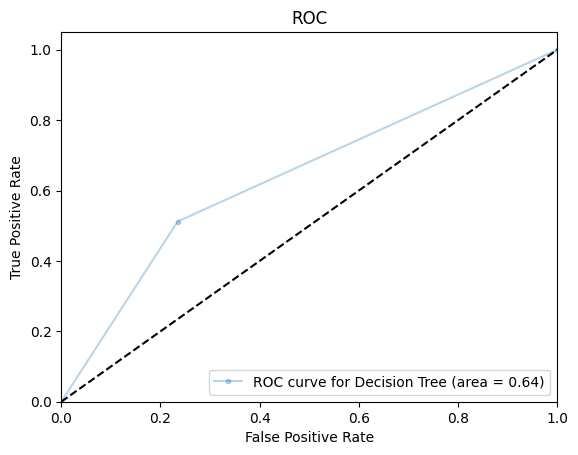

In [120]:
make_roc('Decision Tree', run_DT, X_test_balance, y_test_balance)

##### Random Forest with defaut opts

Applying the same algorithm with Decison tree is random forest. The differences is:
1. We have only 1 tree - 1 root in decision tree. Random forest can have whatever number of treee as needed
2. Decison takes all features for training. Random forest takes random number of feature for each tree

<p>By looking to the way it work we can see that it is more advanced than decision tree, random forest has lower risk of overfitting since it use random function on feature and multiple tree to make decision
<br> The trade off here is computing time. the more tree we have the more computing time is, same with cost aspect.

In [129]:
run_RF = RF_model.fit(X_train_balance, y_train_balance)
run_RF.score(X_test_balance, y_test_balance)

0.6710326262405365

In [130]:
print (classification_report(y_test_balance,run_RF.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73    576162
           1       0.79      0.47      0.59    576162

    accuracy                           0.67   1152324
   macro avg       0.70      0.67      0.66   1152324
weighted avg       0.70      0.67      0.66   1152324



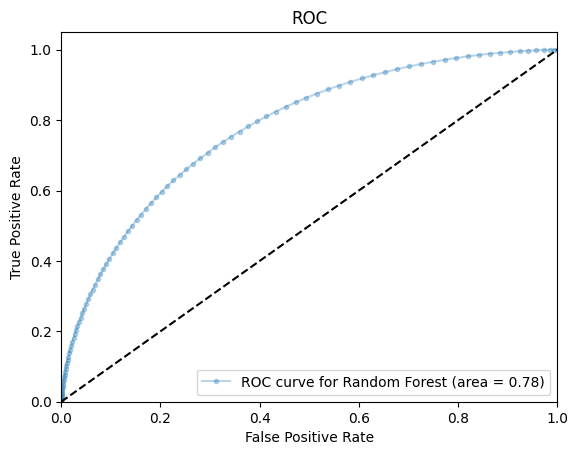

In [131]:
make_roc('Random Forest', run_RF, X_test_balance, y_test_balance)

##### Gaussian Naive Bayes with defaut opts

Follow these step to understand Naive Bayers theorem
1. Let data set have 2 feature and they are independance with each other
2. For each value in features, calculate the probability of value when target (y) = 0 and probability of value when target (y) = 1
3. Calculate probability of y=1 and y=0 (0.5 with balanced dataset)
<br>$P(X1 | y = 0) * P(X2 | y = 0)* 0.5$ => Probability y= 0 with given X1, X2 value 
<br>$P(X1 | y = 1) * P(X2 | y = 1)* 0.5$ => Probability y= 1 with given X1, X2 value
4. Gaussian Naive Bayes model will take decision bases on above result

<br>Gaussian Naive Bayes model also works well with categorical dataset

In [116]:
run_GNB = GNB_model.fit(X_train_balance, y_train_balance)
run_GNB.score(X_test_balance, y_test_balance)

0.6184927155904069

In [117]:
print (classification_report(y_test_balance,run_GNB.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61    576162
           1       0.61      0.64      0.63    576162

    accuracy                           0.62   1152324
   macro avg       0.62      0.62      0.62   1152324
weighted avg       0.62      0.62      0.62   1152324



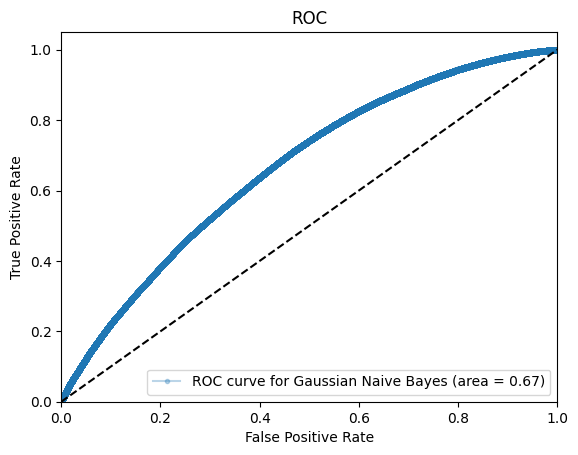

In [119]:
make_roc('Gaussian Naive Bayes', run_GNB, X_test_balance, y_test_balance)

##### Gradient Boosting with defaut opts

A combination of Logistic, Random Forest & Loss function.
1. The model starts with calculating base probability of y = 1 and with logistic(sigmoid) equation
<br> $Base = \frac{e*ln(\frac{y=1}{y=0})}{1+e*ln(\frac{y=1}{y=0})}$
2. Based on the probability, model predict all outcome which called $\hat{Y}$
3. Model takes the wrong predicts $Resudials = Y - \hat{Y}$ through decision tree
4. Then it calculate new probability with sigmoid equation
<br> $ln(odd) = base + learning rate*Resudials$
<br> $New Probability = \frac{e*ln(odd)}{1+e*ln(odd)}$
5. Repeat this process until as needed

In [122]:
run_GB = GB_model.fit(X_train_balance, y_train_balance)
run_GB.score(X_test_balance, y_test_balance)

0.6494805280459315

In [123]:
print (classification_report(y_test_balance,run_GB.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64    576162
           1       0.64      0.68      0.66    576162

    accuracy                           0.65   1152324
   macro avg       0.65      0.65      0.65   1152324
weighted avg       0.65      0.65      0.65   1152324



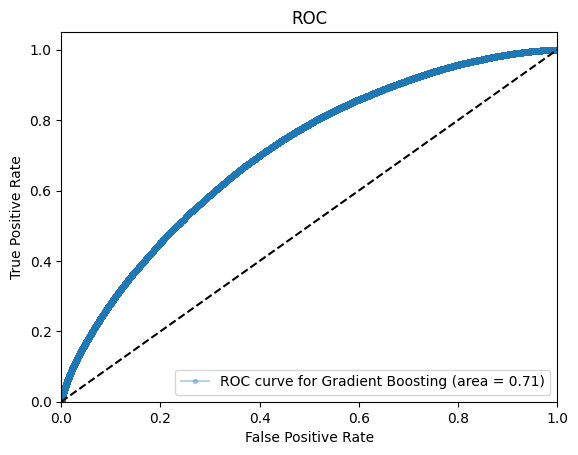

In [124]:
make_roc('Gradient Boosting', run_GB, X_test_balance, y_test_balance)

##### Support Vectore Machine with defaut opts

Let think of a plane (a line in 2 dimension) that separates 2 distinct class of data, the distance from nearest datapoint on each side is maximized.So support Vectore Machine's algorithm is to find that plane

In [125]:
run_SVM = SVM_model.fit(X_train_balance, y_train_balance)
run_SVM.score(X_test_balance, y_test_balance)

0.6150127915412679

In [126]:
print (classification_report(y_test_balance,run_SVM.predict(X_test_balance)))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61    576162
           1       0.61      0.63      0.62    576162

    accuracy                           0.62   1152324
   macro avg       0.62      0.62      0.61   1152324
weighted avg       0.62      0.62      0.61   1152324



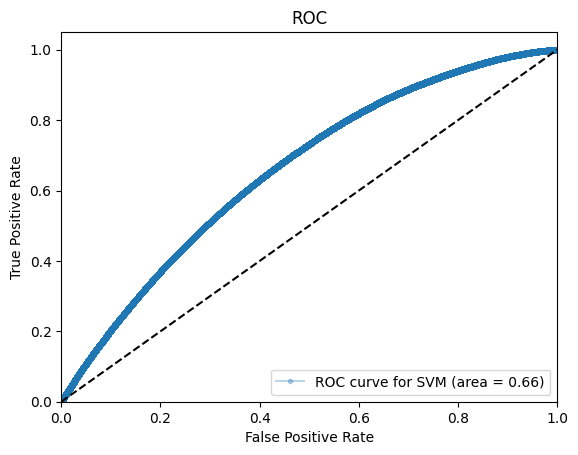

In [128]:
make_roc('SVM', run_SVM, X_test_balance, y_test_balance,proba=None)

Next I use GridSearchCV for hyperparameter tuning
<br> Due to device' performance & running time, only few paramenter is used and some of them even less than default options
<br> For this analysis, Accuracy score is our priority to choose the best parameter, but it should depend on which one you want to minimize: False positive, False negative, or training time

In [146]:
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
GNB_model = GaussianNB()
GB_model = GradientBoostingClassifier()
SVM_model = LinearSVC(max_iter=2000)

In [134]:
def print_dataframe(filtered_cv_results):
    for mean_accuracy, mean_precision, mean_recall, mean_score, params in zip(
        filtered_cv_results['mean_test_accuracy'],
        filtered_cv_results['mean_test_precision'],
        filtered_cv_results['mean_test_recall'],
        filtered_cv_results['mean_score_time'],
        filtered_cv_results['params']
    ):
        print(
            f'Accuracy: {mean_accuracy:0.3f}',
            f'Precision: {mean_precision:0.3f}',
            f'Recall: {mean_recall:0.3f}',
            f'Score time: {mean_score:0.3f}',
            f'For {params}'
        )
    print()

In [149]:
def refit_strategy(cv_results):
    # print the info about the grid-search for the different scores
    cv_results_ = pd.DataFrame(cv_results)
    print('All grid-search results:')
    print_dataframe(cv_results_)
    results = cv_results_
    results = results[
        [
            'mean_score_time',
            'mean_test_accuracy',
            'mean_test_recall',
            'mean_test_precision',
            'rank_test_recall',
            'rank_test_precision',
            'params'
        ]
    ]
    #Print our best accuracy score and its attributes
    highest_accuracy_index = results['mean_test_accuracy'].idxmax()
    print(
        '\nThe selected final model is the highest accuracy score\n'
        f'{results.loc[highest_accuracy_index]}'
    )

    return highest_accuracy_index

In [148]:
## Defind run_model function ##
def run_model(model, X_train, y_train, X_test, y_test, parameters, n_jobs=5, n_folds=3):
    GS = GridSearchCV(model, param_grid=parameters, n_jobs=n_jobs, cv=n_folds,scoring=['accuracy','precision', 'recall'],refit=refit_strategy)
    GS.fit(X_train, y_train)
    ##print ('Best | ', GS.best_params_, ' | ' ,GS.best_score_)
    ##print (GS.cv_results_)
    best = GS.best_estimator_
    model=best.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print ('========== Apply best parameter ===========')
    print ('Accuracy on train data: %0.2f' % (train_accuracy))
    print ('Accuracy on test data: %0.2f' % (test_accuracy))
    print (confusion_matrix(y_test, model.predict(X_test)))
    print ('===========================================')
    ##return model, X_train, y_train, X_test, y_test

In [67]:
LR_para = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
           'solver':['liblinear','saga'],
           'penalty': ['l1', 'l2']}
#LR_para = {'C': [10,100]}
run_model(LR_model, X_train_balance, y_train_balance, X_test_balance, y_test_balance, LR_para)

All grid-search results:
Accuracy: 0.616 Precision: 0.611 Recall: 0.633 Score time: 0.769 For {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.556 For {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.616 Precision: 0.612 Recall: 0.633 Score time: 0.618 For {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.712 For {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.769 For {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.708 For {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.666 For {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.615 Precision: 0.612 Recall: 0.632 Score time: 0.695 For {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.616 Precisi

In [68]:
DT_para = {'max_depth': list(range(5,11,1)),
            'min_samples_leaf': list(range(2,5,2)),
            'min_samples_split': list(range(2,5,2)),
            'criterion': ['gini', 'entropy']}
run_model(DT_model, X_train_balance, y_train_balance, X_test_balance, y_test_balance, DT_para)

All grid-search results:
Accuracy: 0.617 Precision: 0.599 Recall: 0.708 Score time: 0.739 For {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.617 Precision: 0.599 Recall: 0.708 Score time: 0.715 For {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Accuracy: 0.617 Precision: 0.599 Recall: 0.708 Score time: 0.652 For {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.617 Precision: 0.599 Recall: 0.708 Score time: 0.678 For {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}
Accuracy: 0.622 Precision: 0.600 Recall: 0.734 Score time: 0.743 For {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.622 Precision: 0.600 Recall: 0.734 Score time: 0.671 For {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Accuracy: 0.622 Precision: 0.600 Recall: 0.734 Scor

In [138]:
RF_para = {'n_estimators': [50,70]}
           ##'max_depth': list(range(2,5,2)),
           ##'min_samples_leaf': list(range(1,3,1)),
           ##'min_samples_split': list(range(2,4,1)),
           ##'max_features': [2,3]
run_model(RF_model, X_train_balance, y_train_balance, X_test_balance, y_test_balance, RF_para)

All grid-search results:
Accuracy: 0.906 Precision: 0.894 Recall: 0.922 Score time: 30.900 For {'n_estimators': 50}
Accuracy: 0.908 Precision: 0.895 Recall: 0.925 Score time: 45.032 For {'n_estimators': 70}


The selected final model is the highest accuracy score
mean_score_time                   45.031958
mean_test_accuracy                 0.907943
mean_test_recall                   0.924649
mean_test_precision                0.894757
rank_test_recall                          1
rank_test_precision                       1
params                 {'n_estimators': 70}
Name: 1, dtype: object
========== Apply best parameter ===========
Accuracy on train data: 1.00
Accuracy on test data: 0.67
[[503047  73115]
 [308250 267912]]


In [142]:
GB_para = {'learning_rate':[0.05],
           'loss':['log_loss', 'deviance', 'exponential'],
           'n_estimators' : [30]}
run_model(GB_model, X_train_balance, y_train_balance, X_test_balance, y_test_balance, GB_para)

All grid-search results:
Accuracy: 0.624 Precision: 0.604 Recall: 0.719 Score time: 1.060 For {'learning_rate': 0.05, 'loss': 'log_loss', 'n_estimators': 30}
Accuracy: 0.624 Precision: 0.604 Recall: 0.719 Score time: 1.074 For {'learning_rate': 0.05, 'loss': 'deviance', 'n_estimators': 30}
Accuracy: 0.624 Precision: 0.604 Recall: 0.717 Score time: 0.918 For {'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 30}


The selected final model is the highest accuracy score
mean_score_time                                                 1.059972
mean_test_accuracy                                              0.623843
mean_test_recall                                                0.718755
mean_test_precision                                             0.604088
rank_test_recall                                                       1
rank_test_precision                                                    2
params                 {'learning_rate': 0.05, 'loss': 'log_loss', 'n...
Name:

In [143]:
##GNB_para = {}
##run_model(GNB_model, X_balance, y_balance, X_test_balance, y_test_balance, GNB_para)

In [147]:
SVM_para = {'C': [1, 10, 100],
            'loss': ['hinge', 'squared_hinge']}
run_model(SVM_model, X_test_balance, y_test_balance, X_test_balance, y_test_balance, SVM_para)

All grid-search results:
Accuracy: 0.616 Precision: 0.606 Recall: 0.664 Score time: 0.216 For {'C': 1, 'loss': 'hinge'}
Accuracy: 0.616 Precision: 0.611 Recall: 0.635 Score time: 0.286 For {'C': 1, 'loss': 'squared_hinge'}
Accuracy: 0.616 Precision: 0.606 Recall: 0.665 Score time: 0.280 For {'C': 10, 'loss': 'hinge'}
Accuracy: 0.616 Precision: 0.611 Recall: 0.635 Score time: 0.270 For {'C': 10, 'loss': 'squared_hinge'}
Accuracy: 0.616 Precision: 0.605 Recall: 0.668 Score time: 0.284 For {'C': 100, 'loss': 'hinge'}
Accuracy: 0.616 Precision: 0.611 Recall: 0.635 Score time: 0.204 For {'C': 100, 'loss': 'squared_hinge'}


The selected final model is the highest accuracy score
mean_score_time                          0.280475
mean_test_accuracy                       0.615952
mean_test_recall                         0.664907
mean_test_precision                      0.605614
rank_test_recall                                2
rank_test_precision                             5
params            

C:\Users\phkh9002\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\phkh9002\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



========== Apply best parameter ===========
Accuracy on train data: 0.62
Accuracy on test data: 0.62
[[326254 249908]
 [192569 383593]]


Base on model's performance, model's algorithm, and our dataset structure, Model Ranking can be established as below:
1. Random Forest
<br> With large dataset consists of  both categorical & numerical data features, random forest's algorithm is perfectly fit in this case. It shows signficantly reducing of overfitting issue due to it's carelessness data point distribution, difference on data scale. With huge number of tree can be set, the model stability is greatly improved compare to others, every tree are independent of others, and features are randomly seclected which lead to missing value dealing ability.
<br> We can improve Random Forest model's performace by training it with higher n_estimators parameter - indicate number of tree we want to have. However, the training time/computing time is take more time as the tree increase, time means cost in business.

2. Gradiant Bootsing
<br> Using the decision tree and Loss function to tackle the prediction. Gradiant Boosting has scored 2nd place among model
<br> There are similarity between Gradiant Bootsing Random Forest but differences can be hightlighted as below
<br> - While random forest make decision by getting average prediction from number of created tree with randomly input(feature, subset)
<br> - Gradiant Boosting on the other hand, approach to correct prediction by going through and improve prediction with each tree. Ideally, the more tree we put it throught the more accuracy score we have, it also can deal with both categorical, numerical data features, missing value. Its downside is with the same number of tree training time which can take more time than Random Forest since the process can be run in parallel.
<br> It has many parameters so tuning to find the best take time & efforts

3. Gaussian Naïve Bayes
The Gaussian Naïve Bayes is a quick and simple classifier technique.Its probability calculation based on Bayes theorem seem a very good fit with our dataset which combine both category and value, also our target is binary class.Two thing we need to care when using this model is
<br>- Independent feature assumption, remove high correlation feature is essential
<br>- With its algorithm, if there is new value in test set/input which is not presented in training data, the probability of $P(X_{new}|y) $ will be equal to 0 => No predict is made, this phenomenon is called Zero Frequency

4. Decision Tree
<br> Decision Tree is one of most popular model. The Algorithm is fairly understandable and result is not bad at all. But there are things need to watchout when using Decision Tree
<br>- Overfitting when lacking control of tree's depth, number of splits,leafs
<br>- Imbalanced dataset leads to unfair/inaccuray prediction
<br>- Only one tree and minor change of training data set can make the tree change completely => Performace is not stable
<br> To improve model, we reduce data dimension by reducing/reselecting best fit features or using Random Forest

5. Logistic regression
<br>The problem with Logistic regression is Assumption of Linearity. We assume that between y-ouput and X-input there is a linear relationship equation and  start to looking for it then use it to predict outcome.
<br> But most of time data is mess. Then this approach is not a good fit for our data, it got lowest score 0.615
<br> Same with Decision tree, we can somhome improve its performance by reducing data dimension, remove high correlated features,...but not much 

6. Suport vector machine
<br> We have pretty large dataset which not suitable to SVM
<br> The data also is not clearly distinct and we got too many sample of each feature class
<br> These thing can lower SVC model's performance

## IV. Conclusion

In general, depend on which situation we face, different model can be implemented. If performance/accuracy is our top priority then Randome Forest and Radiant Boosting are my top choice, if we need a fast & affordable method let use Gaussian Naive Bayes or Decision Tree.
<p> Some of thoughts about prior probability of our target (Delay/Ontime) that need to be reconsiderd to improve our model behavior. In above analysis, I balanced the dataset so we have 5:5 is ratio of outcome, however, if there is clear evidence that the average ratio is truly around 8:2 over years and got minority changes. We may need to consider to put this probability in our model - Imbalanced data with 8:2 ratio is acceptable.